In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename="finland_full_parliamentary_election_results_2019.csv"
df=pd.read_csv(filename)

In [3]:
df.head()

,Unnamed: 0,Name,Party,Votes,Comparative number,Region,Selected
0,0,"Halla-aho, Jussi",PS,30527,47105,Helsingin vp,Valitaan
1,1,"Andersson, Li",Vas,24404,35348,Varsinais-Suomen vp,Valitaan
2,2,"Häkkänen, Antti",Kok,20231,44177,Kaakkois-Suomen vp,Valitaan
3,3,"Haavisto, Pekka",Vihr,20159,90425,Helsingin vp,Valitaan
4,4,"Lepomäki, Elina",Kok,19273,114285,Uudenmaan vp,Valitaan


In [5]:
# Check the sum of all votes
sum_of_accepted_votes=3078492
check_sum=df.Votes.sum()
print("Sums match: "+str(check_sum==sum_of_accepted_votes))

Sums match: True


In [69]:
df.loc["Selected_01"]=0
df.loc[df.Selected=="Valitaan","Selected_01"]=1

votes_by_party=df.groupby("Party").Votes.sum()
percentage=round(100*votes_by_party/votes_by_party.sum(),2)

seats_if_no_regions=round(percentage*2,0)

seats=df.groupby("Party").Selected_01.sum()

In [119]:
seats_table=pd.DataFrame({"Seats by current system": seats,"Seats if no regions":seats_if_no_regions, "Percentage": percentage, "Difference in seats": seats_if_no_regions-seats})
print("It is noteworthy, that \"Muut\" (Others) contains multiple parties, which were not aligned")
seats_table.sort_values("Seats by current system",ascending=False)



It is noteworthy, that "Muut" (Others) contains multiple parties, which were not aligned


,Seats by current system,Seats if no regions,Percentage,Difference in seats
Party,,,,
SDP,40,35.0,17.72,-5.0
PS,39,35.0,17.50,-4.0
Kok,38,34.0,17.00,-4.0
Kesk,31,28.0,13.75,-3.0
Vihr,20,23.0,11.49,3.0
Vas,16,16.0,8.16,0.0
RKP,9,9.0,4.53,0.0
KD,5,8.0,3.90,3.0
Muut,2,6.0,2.91,4.0


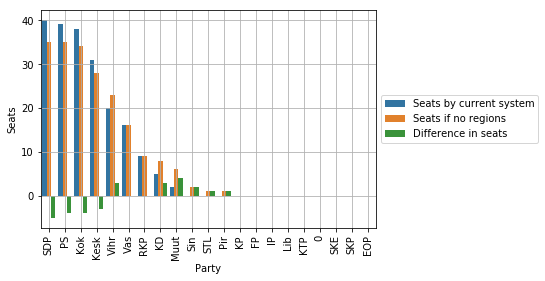

In [120]:
seats_table["Party"]=seats.keys()
melt_table=pd.melt(seats_table, id_vars="Party", var_name="System", value_name="Seats")
# drop percentage
melt_table=melt_table[melt_table.System!="Percentage"]
melt_table=melt_table.sort_values("Seats", ascending=False)

sns.barplot(x="Party",y="Seats",hue="System",data=melt_table)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()